In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
m_rents = pd.read_csv('F:/TGT AXP/Projects/Mumbai_House_Rent Predictor/Mumbai_House_Rent.csv')

In [3]:
m_rents

Locality             Type Rent/Month Build_up_area(sq.ft)  \
0            Bhandup   1 RK Apartment       3500            400 sq.ft   
1           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
2           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
3             Masjid   1 RK Apartment       4000            151 sq.ft   
4            Bhandup   1 RK Apartment       5000            275 sq.ft   
...              ...              ...        ...                  ...   
15381  Nariman Point  3 BHK Apartment     450000           2880 sq.ft   
15382         Bandra  3 BHK Apartment     500000           1500 sq.ft   
15383     Prabhadevi  3 BHK Apartment     500000           2200 sq.ft   
15384      Ghatkopar   1 RK Apartment    1000000            225 sq.ft   
15385     Vidyavihar   1 RK Apartment    1000000            225 sq.ft   

            Furnishing Bathrooms  Balcony Parking Carpet_area(sq.ft)  
0      Fully Furnished         1  Missing       0            Missing  
1       Semi Furnished         1  Missing       0          325 sq.ft  
2       Semi Furnished   Missing  Missing       0          325 sq.ft  
3          Unfurnished   Missing  Missing       1          150 sq.ft  
4       Semi Furnished         2  Missing       1            Missing  
...                ...       ...      ...     ...                ...  
15381  Fully Furnished         4  Missing       0         2500 sq.ft  
15382  Fully Furnished         3        3       1         1300 sq.ft  
15383  Fully Furnished         3        1       2         1500 sq.ft  
15384   Semi Furnished   Missing  Missing       2          200 sq.ft  
15385   Semi Furnished   Missing  Missing       2          200 sq.ft  

[15386 rows x 9 columns]

In [4]:
m_rents.nunique()

Locality                 40
Type                      4
Rent/Month              558
Build_up_area(sq.ft)    865
Furnishing                3
Bathrooms                 8
Balcony                   7
Parking                   6
Carpet_area(sq.ft)      755
dtype: int64

In [5]:
m_rents['Bathrooms'].unique()

array(['1', 'Missing', '2', '3', '4', '5', '6', '7'], dtype=object)

In [6]:
# Lets try to check if these missing values are for smaller flats, in which case we can replace "missing" with 1, else we will try to replace it with median values 

In [7]:
m_rents[(m_rents['Bathrooms']=='Missing')]

Locality             Type Rent/Month Build_up_area(sq.ft)  \
2         Vikhroli  1 BHK Apartment       3750            400 sq.ft   
3           Masjid   1 RK Apartment       4000            151 sq.ft   
9            Powai   1 RK Apartment       5000            300 sq.ft   
13       Ghatkopar   1 RK Apartment       6000            600 sq.ft   
34           Powai   1 RK Apartment       7000            310 sq.ft   
...            ...              ...        ...                  ...   
15290        Worli  3 BHK Apartment     250000           3520 sq.ft   
15332  Mahalakshmi  3 BHK Apartment     300000           2700 sq.ft   
15333  Mahalakshmi  3 BHK Apartment     300000           2700 sq.ft   
15384    Ghatkopar   1 RK Apartment    1000000            225 sq.ft   
15385   Vidyavihar   1 RK Apartment    1000000            225 sq.ft   

            Furnishing Bathrooms  Balcony Parking Carpet_area(sq.ft)  
2       Semi Furnished   Missing  Missing       0          325 sq.ft  
3          Unfurnished   Missing  Missing       1          150 sq.ft  
9      Fully Furnished   Missing  Missing       0            Missing  
13         Unfurnished   Missing  Missing       0            Missing  
34         Unfurnished   Missing  Missing       0          225 sq.ft  
...                ...       ...      ...     ...                ...  
15290      Unfurnished   Missing  Missing       0         2200 sq.ft  
15332  Fully Furnished   Missing  Missing       0         1750 sq.ft  
15333  Fully Furnished   Missing  Missing       0         1750 sq.ft  
15384   Semi Furnished   Missing  Missing       2          200 sq.ft  
15385   Semi Furnished   Missing  Missing       2          200 sq.ft  

[404 rows x 9 columns]

In [8]:
#Wouldn't be a very good idea to drop the rows here bathrooms data is missing or replace them with median values. 
#So instead, let's take a more sensible assumption of assuming bathrooms = number of rooms (usually the case in most Mumbai flats)   

In [137]:
m_rents_hue=m_rents["room_count"]
m_rents["room_count"] = pd.to_numeric(m_rents['Type'].astype(str).str[0])

In [10]:
m_rents["room_count"]

#df.loc[df['First Season'] > 1990, 'First Season'] = 1


0        1
1        1
2        1
3        1
4        1
        ..
15381    3
15382    3
15383    3
15384    1
15385    1
Name: room_count, Length: 15386, dtype: int64

In [11]:
m_rents

Locality             Type Rent/Month Build_up_area(sq.ft)  \
0            Bhandup   1 RK Apartment       3500            400 sq.ft   
1           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
2           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
3             Masjid   1 RK Apartment       4000            151 sq.ft   
4            Bhandup   1 RK Apartment       5000            275 sq.ft   
...              ...              ...        ...                  ...   
15381  Nariman Point  3 BHK Apartment     450000           2880 sq.ft   
15382         Bandra  3 BHK Apartment     500000           1500 sq.ft   
15383     Prabhadevi  3 BHK Apartment     500000           2200 sq.ft   
15384      Ghatkopar   1 RK Apartment    1000000            225 sq.ft   
15385     Vidyavihar   1 RK Apartment    1000000            225 sq.ft   

            Furnishing Bathrooms  Balcony Parking Carpet_area(sq.ft)  \
0      Fully Furnished         1  Missing       0            Missing   
1       Semi Furnished         1  Missing       0          325 sq.ft   
2       Semi Furnished   Missing  Missing       0          325 sq.ft   
3          Unfurnished   Missing  Missing       1          150 sq.ft   
4       Semi Furnished         2  Missing       1            Missing   
...                ...       ...      ...     ...                ...   
15381  Fully Furnished         4  Missing       0         2500 sq.ft   
15382  Fully Furnished         3        3       1         1300 sq.ft   
15383  Fully Furnished         3        1       2         1500 sq.ft   
15384   Semi Furnished   Missing  Missing       2          200 sq.ft   
15385   Semi Furnished   Missing  Missing       2          200 sq.ft   

       room_count  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
15381           3  
15382           3  
15383           3  
15384           1  
15385           1  

[15386 rows x 10 columns]

In [12]:
m_rents["Bathrooms"].replace(['Missing'],[m_rents.room_count],inplace=True)

In [13]:
m_rents

Locality             Type Rent/Month Build_up_area(sq.ft)  \
0            Bhandup   1 RK Apartment       3500            400 sq.ft   
1           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
2           Vikhroli  1 BHK Apartment       3750            400 sq.ft   
3             Masjid   1 RK Apartment       4000            151 sq.ft   
4            Bhandup   1 RK Apartment       5000            275 sq.ft   
...              ...              ...        ...                  ...   
15381  Nariman Point  3 BHK Apartment     450000           2880 sq.ft   
15382         Bandra  3 BHK Apartment     500000           1500 sq.ft   
15383     Prabhadevi  3 BHK Apartment     500000           2200 sq.ft   
15384      Ghatkopar   1 RK Apartment    1000000            225 sq.ft   
15385     Vidyavihar   1 RK Apartment    1000000            225 sq.ft   

            Furnishing Bathrooms  Balcony Parking Carpet_area(sq.ft)  \
0      Fully Furnished         1  Missing       0            Missing   
1       Semi Furnished         1  Missing       0          325 sq.ft   
2       Semi Furnished         1  Missing       0          325 sq.ft   
3          Unfurnished         1  Missing       1          150 sq.ft   
4       Semi Furnished         2  Missing       1            Missing   
...                ...       ...      ...     ...                ...   
15381  Fully Furnished         4  Missing       0         2500 sq.ft   
15382  Fully Furnished         3        3       1         1300 sq.ft   
15383  Fully Furnished         3        1       2         1500 sq.ft   
15384   Semi Furnished         1  Missing       2          200 sq.ft   
15385   Semi Furnished         1  Missing       2          200 sq.ft   

       room_count  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
15381           3  
15382           3  
15383           3  
15384           1  
15385           1  

[15386 rows x 10 columns]

In [14]:
m_rents[(m_rents['Bathrooms']=='Missing')]

Empty DataFrame
Columns: [Locality, Type, Rent/Month, Build_up_area(sq.ft), Furnishing, Bathrooms, Balcony, Parking, Carpet_area(sq.ft), room_count]
Index: []

In [15]:
#Above check confirms no rows now have Bathrooms count = Zero

In [16]:
# But in case of balconies, it is very common for houses in Mumbai to not have any balconies, so lets just replace missing with zero

In [17]:
m_rents["Balcony"].replace(['Missing'], 0, inplace=True)

In [18]:
m_rents[m_rents['Balcony']=='Missing']

Empty DataFrame
Columns: [Locality, Type, Rent/Month, Build_up_area(sq.ft), Furnishing, Bathrooms, Balcony, Parking, Carpet_area(sq.ft), room_count]
Index: []

In [19]:
#Above check confirms All missing balconies set to Zero successfully

In [20]:
#Now, we also need to enter a check on number of bathrooms and balconies so that they have realistic values.

# Basically if we see at these values, these are commonly overquoted in the data-set above such as the case that 1 BHK can't have 3 balconies and 5 bathrooms. 

# we will restrict these values to room_count + 1, so that a n BHK doesn't have more than n balcony / bathrooms

In [21]:
m_rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  object
 3   Build_up_area(sq.ft)  15386 non-null  object
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  object
 6   Balcony               15386 non-null  object
 7   Parking               15351 non-null  object
 8   Carpet_area(sq.ft)    15386 non-null  object
 9   room_count            15386 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [22]:
# Let's first reduce space usage of this dataframe

m_rents['Bathrooms'] = m_rents['Bathrooms'].astype(int)

m_rents['Balcony'] = m_rents['Balcony'].astype(int)

In [23]:
m_rents['Parking'].unique()

array(['0', '1', '3', '2', ' ', nan, '4'], dtype=object)

In [24]:
m_rents['Parking'] = m_rents['Parking'].fillna(0)

In [25]:
m_rents['Parking'].unique()

array(['0', '1', '3', '2', ' ', 0, '4'], dtype=object)

In [26]:
m_rents["Parking"].replace([' '], 0, inplace=True)

In [27]:
m_rents["Balcony"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [28]:
m_rents["Bathrooms"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [29]:
# Now target to limit bathrooms, balconies and parking count equal to  than room count+1

In [30]:
m_rents['Bathrooms'] = np.where((m_rents['Bathrooms'] > m_rents['room_count']+1), (m_rents['room_count']), m_rents['Bathrooms'])

In [31]:
m_rents['Bathrooms'].unique()

# Bathroom data is now cleaned up to  use.

array([1, 2, 3, 4], dtype=int64)

In [32]:
m_rents['Balcony'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
m_rents['Balcony'] = np.where((m_rents['Balcony'] > m_rents['room_count']), (m_rents['room_count']), m_rents['Balcony'])

In [34]:
m_rents['Balcony'].unique()
# Balcony data is now cleaned up to  use. 

array([0, 1, 2, 3], dtype=int64)

In [35]:
m_rents['Parking'].unique()

# This data seems more sensible compared to the raw unprocessed data of Bathrooms and balconies

array(['0', '1', '3', '2', 0, '4'], dtype=object)

In [36]:
# Let's only adjust it such that any flat doesn't have more than 1 extra parking compared o it's room which means that a 1BHK shouldn't have more than 2 parkings.Which practically is the limit in most cases
m_rents['Parking'] = pd.to_numeric(m_rents['Parking'])
m_rents['Parking'] = np.where((m_rents['Parking'] > m_rents['room_count']+1), (m_rents['room_count']), m_rents['Parking'])

In [37]:
m_rents['Parking'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [38]:
pd.set_option('display.max_rows',None)

m_rents[['room_count','Bathrooms','Parking','Balcony']]

room_count  Bathrooms  Parking  Balcony
0               1          1        0        0
1               1          1        0        0
2               1          1        0        0
3               1          1        1        0
4               1          2        1        0
5               1          1        0        0
6               1          1        0        0
7               1          1        0        0
8               1          1        1        1
9               1          1        0        0
10              1          1        0        0
11              1          1        2        0
12              1          1        2        0
13              1          1        0        0
14              1          1        2        0
15              1          1        2        1
16              1          1        0        0
17              1          1        0        0
18              1          1        0        0
19              2          2        2        0
20              2          2        2        0
21              1          1        0        0
22              1          1        1        1
23              1          1        1        0
24              1          1        0        0
25              1          1        2        1
26              1          1        2        1
27              1          1        0        1
28              1          1        0        0
29              1          1        0        0
30              1          1        0        0
31              1          1        1        0
32              1          1        0        0
33              1          1        0        0
34              1          1        0        0
35              1          1        1        1
36              1          1        0        0
37              1          1        1        1
38              1          1        0        0
39              1          1        0        0
40              1          1        0        0
41              1          1        0        0
42              1          1        0        0
43              1          1        0        0
44              1          1        2        0
45              1          2        2        1
46              1          2        1        0
47              1          2        2        0
48              1          1        1        0
49              1          2        2        0
50              1          2        2        0
51              1          2        2        0
52              1          1        1        0
53              1          1        1        0
54              1          1        2        0
55              1          1        0        0
56              1          1        0        1
57              1          1        0        0
58              1          1        1        0
59              1          1        0        1
60              1          1        0        0
61              1          1        1        0
62              1          1        1        0
63              1          1        0        0
64              1          1        0        0
65              1          1        0        0
66              1          1        1        0
67              1          1        1        0
68              1          1        1        0
69              1          1        0        0
70              1          1        1        0
71              1          1        0        0
72              1          1        0        0
73              1          1        1        0
74              1          1        1        0
75              1          1        1        1
76              1          1        0        0
77              1          1        0        0
78              1          1        0        0
79              1          1        0        0
80              1          1        1        0
81              1          2        0        0
82              1          1        0        0
83              1          1        0        0
84          

In [39]:
m_rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  object
 3   Build_up_area(sq.ft)  15386 non-null  object
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  int64 
 6   Balcony               15386 non-null  int64 
 7   Parking               15386 non-null  int64 
 8   Carpet_area(sq.ft)    15386 non-null  object
 9   room_count            15386 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.2+ MB


In [40]:
m_rents.columns

Index(['Locality', 'Type', 'Rent/Month', 'Build_up_area(sq.ft)', 'Furnishing',
       'Bathrooms', 'Balcony', 'Parking', 'Carpet_area(sq.ft)', 'room_count'],
      dtype='object')

In [41]:
m_rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  object
 3   Build_up_area(sq.ft)  15386 non-null  object
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  int64 
 6   Balcony               15386 non-null  int64 
 7   Parking               15386 non-null  int64 
 8   Carpet_area(sq.ft)    15386 non-null  object
 9   room_count            15386 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.2+ MB


In [42]:
m_rents.head()

Locality             Type Rent/Month Build_up_area(sq.ft)       Furnishing  \
0   Bhandup   1 RK Apartment       3500            400 sq.ft  Fully Furnished   
1  Vikhroli  1 BHK Apartment       3750            400 sq.ft   Semi Furnished   
2  Vikhroli  1 BHK Apartment       3750            400 sq.ft   Semi Furnished   
3    Masjid   1 RK Apartment       4000            151 sq.ft      Unfurnished   
4   Bhandup   1 RK Apartment       5000            275 sq.ft   Semi Furnished   

   Bathrooms  Balcony  Parking Carpet_area(sq.ft)  room_count  
0          1        0        0            Missing           1  
1          1        0        0          325 sq.ft           1  
2          1        0        0          325 sq.ft           1  
3          1        0        1          150 sq.ft           1  
4          2        0        1            Missing           1

In [43]:
m_rents['Rent/Month'] = m_rents['Rent/Month'].str.replace(',', '').astype(float)

In [44]:
m_rents = m_rents.astype({"Rent/Month": "Int32" , "Bathrooms": "Int8", "Balcony": "Int8", "Parking": "Int8", "room_count":"Int8"})

In [45]:
m_rents["Rent/Month"].unique()

<IntegerArray>
[   3500,    3750,    4000,    5000,    6000,    6500,    7000,    7500,
    8000,    8100,
 ...
  330000,  340000,  350000,  375000,  380000,  400000,  425000,  450000,
  500000, 1000000]
Length: 493, dtype: Int32

In [46]:
m_rents.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  Int32 
 3   Build_up_area(sq.ft)  15386 non-null  object
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  Int8  
 6   Balcony               15386 non-null  Int8  
 7   Parking               15386 non-null  Int8  
 8   Carpet_area(sq.ft)    15386 non-null  object
 9   room_count            15386 non-null  Int8  
dtypes: Int32(1), Int8(4), object(5)
memory usage: 5.2 MB


In [47]:
m_rents.head()

Locality             Type  Rent/Month Build_up_area(sq.ft)  \
0   Bhandup   1 RK Apartment        3500            400 sq.ft   
1  Vikhroli  1 BHK Apartment        3750            400 sq.ft   
2  Vikhroli  1 BHK Apartment        3750            400 sq.ft   
3    Masjid   1 RK Apartment        4000            151 sq.ft   
4   Bhandup   1 RK Apartment        5000            275 sq.ft   

        Furnishing  Bathrooms  Balcony  Parking Carpet_area(sq.ft)  room_count  
0  Fully Furnished          1        0        0            Missing           1  
1   Semi Furnished          1        0        0          325 sq.ft           1  
2   Semi Furnished          1        0        0          325 sq.ft           1  
3      Unfurnished          1        0        1          150 sq.ft           1  
4   Semi Furnished          2        0        1            Missing           1

In [48]:
m_rents['Carpet_area(sq.ft)'] = m_rents['Carpet_area(sq.ft)'].str.replace('Missing', '0')

m_rents['Carpet_area(sq.ft)'] = m_rents['Carpet_area(sq.ft)'].str.replace('sq.ft', '')

In [49]:
m_rents['Carpet_area(sq.ft)']

0            0
1         325 
2         325 
3         150 
4            0
5         160 
6         150 
7         150 
8         330 
9            0
10        160 
11        280 
12        280 
13           0
14        240 
15        500 
16        150 
17        225 
18        225 
19        710 
20        710 
21           0
22           0
23        180 
24           0
25        239 
26        249 
27        225 
28        225 
29        225 
30        225 
31        225 
32        225 
33        225 
34        225 
35        225 
36        225 
37        225 
38           0
39        180 
40        225 
41        200 
42        180 
43        200 
44        180 
45        180 
46        180 
47        180 
48        180 
49        180 
50        180 
51        180 
52        180 
53        180 
54        180 
55        180 
56        180 
57        180 
58        180 
59        180 
60        180 
61           0
62        180 
63        180 
64           0
65           0
66        

In [50]:
m_rents['Carpet_area(sq.ft)'] = m_rents['Carpet_area(sq.ft)'].astype(int)

In [51]:
m_rents.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  Int32 
 3   Build_up_area(sq.ft)  15386 non-null  object
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  Int8  
 6   Balcony               15386 non-null  Int8  
 7   Parking               15386 non-null  Int8  
 8   Carpet_area(sq.ft)    15386 non-null  int32 
 9   room_count            15386 non-null  Int8  
dtypes: Int32(1), Int8(4), int32(1), object(4)
memory usage: 736.4+ KB


In [52]:
#repeating same for buildup area

m_rents['Build_up_area(sq.ft)'] = m_rents['Build_up_area(sq.ft)'].str.replace('Missing','0')

m_rents['Build_up_area(sq.ft)'] = m_rents['Build_up_area(sq.ft)'].str.replace('sq.ft','')

m_rents['Build_up_area(sq.ft)'] = m_rents['Build_up_area(sq.ft)'].astype(int)

In [53]:
m_rents['Build_up_area(sq.ft)']

0         400
1         400
2         400
3         151
4         275
5         180
6         180
7         180
8         470
9         300
10        180
11        320
12        325
13        600
14        250
15        500
16        180
17        310
18        350
19        900
20        900
21        185
22        225
23        280
24        400
25        250
26        250
27        310
28        275
29        310
30        310
31        310
32        350
33        350
34        310
35        275
36        270
37        275
38        400
39        225
40        350
41        250
42        200
43        200
44        225
45        225
46        225
47        225
48        225
49        225
50        225
51        225
52        225
53        225
54        225
55        225
56        225
57        225
58        225
59        225
60        200
61        180
62        225
63        225
64        172
65        180
66        275
67        275
68        275
69        275
70        275
71    

In [54]:
m_rents['Build_up_area(sq.ft)'].unique()

array([ 400,  151,  275,  180,  470,  300,  320,  325,  600,  250,  500,
        310,  350,  900,  185,  225,  280,  270,  200,  172,  290,  190,
        226,  220,  110,  980,  550,  256,  259,  257,  239,  268,  246,
        242,  253,  249,  252,  243,  258,  244,  234,  255,  264,  265,
        269,  261,  266,  238,  245,  344,  750,  285,  150,  145,  210,
        352,  450, 1050,  330,  340,  228, 1111,  160,  260,  240, 1540,
        520,  215,  425,  420,  460,  375,  328,  410,  230,  385,  426,
        380,  361,  545,  467,  544,  532,  440,  490,  335, 2000,  315,
        370,  515,  495,  510,  530,  535,  610,  390,  405,  363,  700,
        387,  421,  455,  351,  475,  555,  565,  480,  650,  372,  620,
        540,  360,  365,  590,  235,  800,  309,  339,  423,  525,  570,
        580,  430,  488,  575,  625,  560,  786,  216,  730,  476,  485,
        432,  675,  585,  465,  612,  452,  564, 1800,  437,  526,  595,
        486,  457,  304,  305,  456,  561,  582,  8

In [55]:
# So we donot have any zero values in built up area, but unfortunately we do have some such cases where carpet area is zero.Let's check

m_rents['Carpet_area(sq.ft)'].unique()

array([   0,  325,  150,  160,  330,  280,  240,  500,  225,  710,  180,
        239,  249,  200,  190,  250,  780,  450,  300,  227,  550,  145,
        270,  350,  800,  170,  230,  234,  590,  320,  370,  220,  269,
        360,  430,  255,  238,  305,  310,  185,  256,  290,  306,  340,
        380,  295,  390,  392,  402, 1700,  375,  400,  387,  415,  395,
        237,  363,  422,  324,  285,  313,  321,  315,  461,  260,  365,
        410,  210,  195,  600,  275,  181,  261,  175,  355,  322,  445,
        480,  575,  399,  245,  470,  228,  420,  349,  323,  630,  259,
        389,  398,  610,  490,  385,  525,  530,  505,  520,  309,  358,
        282,  316,  595,  440,  425,  495,  435,  455,  486,  292,  235,
       1500,  650,  560,  540,  750,  475,  469,  496,  465,  460,  265,
        377,  421,  337,  428,  700,  570,  318,  279,  444,  580,  458,
        327,  740,  513,  557,  462,  620,  452,  612,  485,  437,  467,
        545,  416,  588,  510,  434,  423,  660,  4

In [56]:
m_rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Locality              15386 non-null  object
 1   Type                  15386 non-null  object
 2   Rent/Month            15386 non-null  Int32 
 3   Build_up_area(sq.ft)  15386 non-null  int32 
 4   Furnishing            15386 non-null  object
 5   Bathrooms             15386 non-null  Int8  
 6   Balcony               15386 non-null  Int8  
 7   Parking               15386 non-null  Int8  
 8   Carpet_area(sq.ft)    15386 non-null  int32 
 9   room_count            15386 non-null  Int8  
dtypes: Int32(1), Int8(4), int32(2), object(3)
memory usage: 676.3+ KB


In [57]:
m_rents[m_rents['Carpet_area(sq.ft)'] == 0].count()

Locality                2116
Type                    2116
Rent/Month              2116
Build_up_area(sq.ft)    2116
Furnishing              2116
Bathrooms               2116
Balcony                 2116
Parking                 2116
Carpet_area(sq.ft)      2116
room_count              2116
dtype: int64

In [58]:
m_rents[m_rents['Build_up_area(sq.ft)'] == 0].count()

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
Carpet_area(sq.ft)      0
room_count              0
dtype: int64

In [73]:
# So we can see here that approximately 15% of our data-set as no data for carpet area but all rows do have data for build_up_area
# If we try to drop all these rows, we will loose 15 % data. Instead lets do one thing 
# let's calculate Carpet area to Build-up area for all rows, then we will use the average of each type(1RK, 1BHK, ..3BHK) to calculate carpe area for rows where we don't have carpet area  

#Based on global statistics, Carpet area is usually 770% of build up area. Let's allow this criteria to fill in zero values. 

#If carpet area >build up area, this is not possible. Thus we check for this integrity on our dataset

Incorrect_Carpet_area = m_rents.loc[(m_rents['Carpet_area(sq.ft)']>m_rents['Build_up_area(sq.ft)'])]

Incorrect_Carpet_area

Empty DataFrame
Columns: [Locality, Type, Rent/Month, Build_up_area(sq.ft), Furnishing, Bathrooms, Balcony, Parking, Carpet_area(sq.ft), room_count]
Index: []

In [74]:
conditions = [(m_rents['Carpet_area(sq.ft)']==0)]

choices = [m_rents['Build_up_area(sq.ft)']*0.7]

m_rents['Carpet_area(sq.ft)']=np.select(conditions, choices, default = m_rents['Carpet_area(sq.ft)'])

In [75]:
m_rents['Carpet_area(sq.ft)'].unique()

array([ 280.,  325.,  150., ..., 1563., 2250., 1788.])

In [83]:
# The above operation shows we have successfully corrected this error and performed the data validation step here.

# Lets try to see plots of our data

m_rents_temp = m_rents.drop(['Locality', 'Type', 'Furnishing'], axis = 1)


In [85]:
m_rents_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rent/Month            15386 non-null  Int32  
 1   Build_up_area(sq.ft)  15386 non-null  int32  
 2   Bathrooms             15386 non-null  Int8   
 3   Balcony               15386 non-null  Int8   
 4   Parking               15386 non-null  Int8   
 5   Carpet_area(sq.ft)    15386 non-null  float64
 6   room_count            15386 non-null  Int8   
dtypes: Int32(1), Int8(4), float64(1), int32(1)
memory usage: 375.8 KB


In [100]:
m_rents_temp['room_count']=m_rents_temp['room_count'].astype('str')

In [101]:
m_rents_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rent/Month            15386 non-null  Int32  
 1   Build_up_area(sq.ft)  15386 non-null  int32  
 2   Bathrooms             15386 non-null  Int8   
 3   Balcony               15386 non-null  Int8   
 4   Parking               15386 non-null  Int8   
 5   Carpet_area(sq.ft)    15386 non-null  float64
 6   room_count            15386 non-null  object 
dtypes: Int32(1), Int8(3), float64(1), int32(1), object(1)
memory usage: 465.9+ KB


<Axes: xlabel='Carpet_area(sq.ft)', ylabel='Rent/Month'>

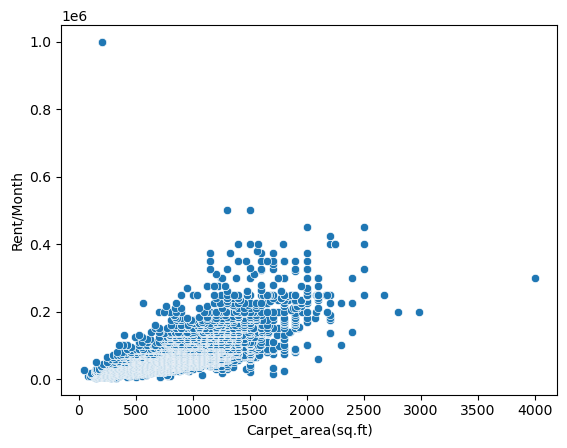

In [104]:

sns.scatterplot(x= m_rents['Carpet_area(sq.ft)'], y= m_rents['Rent/Month'])


In [105]:
# This chart shows two outliers (One where rent is very high and capet area as very less, second to extreme right. Let's remove both)

In [108]:
m_rents['Rent/Month'].unique()

<IntegerArray>
[   3500,    3750,    4000,    5000,    6000,    6500,    7000,    7500,
    8000,    8100,
 ...
  330000,  340000,  350000,  375000,  380000,  400000,  425000,  450000,
  500000, 1000000]
Length: 493, dtype: Int32

In [110]:
m_rents.loc[(m_rents['Carpet_area(sq.ft)']>3500)]

Locality             Type  Rent/Month  Build_up_area(sq.ft)  \
15339    Worli  3 BHK Apartment      300000                  5200   

           Furnishing  Bathrooms  Balcony  Parking  Carpet_area(sq.ft)  \
15339  Semi Furnished          4        3        2              4000.0   

       room_count  
15339           3

In [112]:
m_rents.loc[(m_rents['Rent/Month']>600000)]

Locality            Type  Rent/Month  Build_up_area(sq.ft)  \
15384   Ghatkopar  1 RK Apartment     1000000                   225   
15385  Vidyavihar  1 RK Apartment     1000000                   225   

           Furnishing  Bathrooms  Balcony  Parking  Carpet_area(sq.ft)  \
15384  Semi Furnished          1        0        2               200.0   
15385  Semi Furnished          1        0        2               200.0   

       room_count  
15384           1  
15385           1

In [128]:
# These are also wrong data. Lets remove rows 15339, 15384 and 15385

m_rents = m_rents.drop(index = [15339,15384,15385])


In [119]:
m_rents.reset_index

<bound method DataFrame.reset_index of             Locality             Type  Rent/Month  Build_up_area(sq.ft)  \
0            Bhandup   1 RK Apartment        3500                   400   
1           Vikhroli  1 BHK Apartment        3750                   400   
2           Vikhroli  1 BHK Apartment        3750                   400   
3             Masjid   1 RK Apartment        4000                   151   
4            Bhandup   1 RK Apartment        5000                   275   
5            Bhandup  1 BHK Apartment        5000                   180   
6            Girgaon   1 RK Apartment        5000                   180   
7         Grant Road   1 RK Apartment        5000                   180   
8              Parel  1 BHK Apartment        5000                   470   
9              Powai   1 RK Apartment        5000                   300   
10              Sion   1 RK Apartment        5000                   180   
11           Byculla   1 RK Apartment        6000            

In [129]:
m_rents.iloc[15300:15400,:]

Locality             Type  Rent/Month  Build_up_area(sq.ft)  \
15300          Worli  3 BHK Apartment      250000                  2350   
15301          Worli  3 BHK Apartment      250000                  3400   
15302          Worli  3 BHK Apartment      250000                  3200   
15303          Worli  3 BHK Apartment      250000                  3400   
15304          Worli  3 BHK Apartment      250000                  3200   
15305         Bandra  3 BHK Apartment      260000                  2500   
15306         Bandra  3 BHK Apartment      260000                  1500   
15307     Prabhadevi  3 BHK Apartment      260000                  1850   
15308     Prabhadevi  3 BHK Apartment      260000                  1850   
15309          Worli  3 BHK Apartment      260000                  2000   
15310          Worli  3 BHK Apartment      260000                  2500   
15311     Prabhadevi  3 BHK Apartment      265000                  2000   
15312          Worli  3 BHK Apartment      265000                  2593   
15313  Nariman Point  3 BHK Apartment      270000                  1350   
15314          Worli  3 BHK Apartment      270000                  2500   
15315         Bandra  3 BHK Apartment      275000                  1750   
15316         Bandra  3 BHK Apartment      275000                  2000   
15317     Prabhadevi  3 BHK Apartment      275000                  1600   
15318     Prabhadevi  3 BHK Apartment      275000                  1850   
15319     Prabhadevi  3 BHK Apartment      275000                  1850   
15320          Worli  3 BHK Apartment      275000                  2850   
15321          Worli  3 BHK Apartment      275000                  1600   
15322          Worli  3 BHK Apartment      275000                  1700   
15323         Bandra  3 BHK Apartment      280000                  2000   
15324          Worli  3 BHK Apartment      280000                  1900   
15325           Juhu  3 BHK Apartment      300000                  2400   
15326           Juhu  3 BHK Apartment      300000                  2520   
15327           Juhu  3 BHK Apartment      300000                  2400   
15328           Juhu  3 BHK Apartment      300000                  2100   
15329           Juhu  3 BHK Apartment      300000                  2400   
15330           Juhu  3 BHK Apartment      300000                  1800   
15331           Juhu  3 BHK Apartment      300000                  2400   
15332    Mahalakshmi  3 BHK Apartment      300000                  2700   
15333    Mahalakshmi  3 BHK Apartment      300000                  2700   
15334    Mahalakshmi  3 BHK Apartment      300000                  2500   
15335  Nariman Point  2 BHK Apartment      300000                  1600   
15336          Worli  3 BHK Apartment      300000                  1800   
15337          Worli  3 BHK Apartment      300000                  3150   
15338          Worli  3 BHK Apartment      300000                  3050   
15340         Bandra  3 BHK Apartment      310000                  1200   
15341          Worli  3 BHK Apartment      310000                  2250   
15342           Juhu  3 BHK Apartment      320000                  2800   
15343          Worli  3 BHK Apartment      324000                  2361   
15344         Bandra  3 BHK Apartment      325000                  2000   
15345           Khar  3 BHK Apartment      325000                  2000   
15346           Khar  3 BHK Apartment      325000                  2600   
15347     Prabhadevi  3 BHK Apartment      325000                  2500   
15348          Worli  3 BHK Apartment      325000                  2400   
15349          Worli  3 BHK Apartment      325000                  2150   
15350          Worli  3 BHK Apartment      325000                  2200   
15351          Worli  3 BHK Apartment      325000                  1650   
15352         Bandra  3 BHK Apartment      330000                  1950   
15353          Worli  3 BHK Apartment

In [125]:
# We can see, postional re-indexing is complete after we have emoved outliers


<Axes: xlabel='Carpet_area(sq.ft)', ylabel='Rent/Month'>

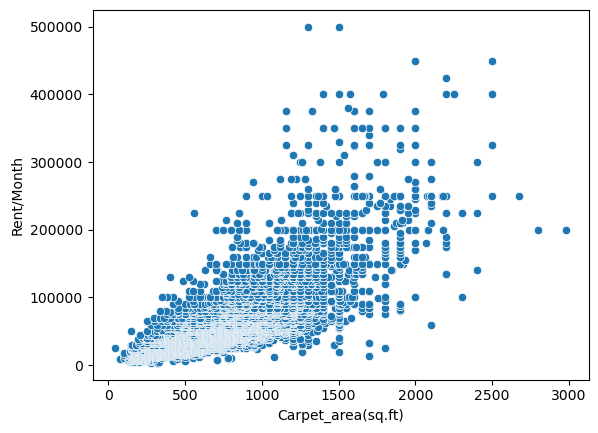

In [130]:

sns.scatterplot(x= m_rents['Carpet_area(sq.ft)'], y= m_rents['Rent/Month'])


<Axes: >

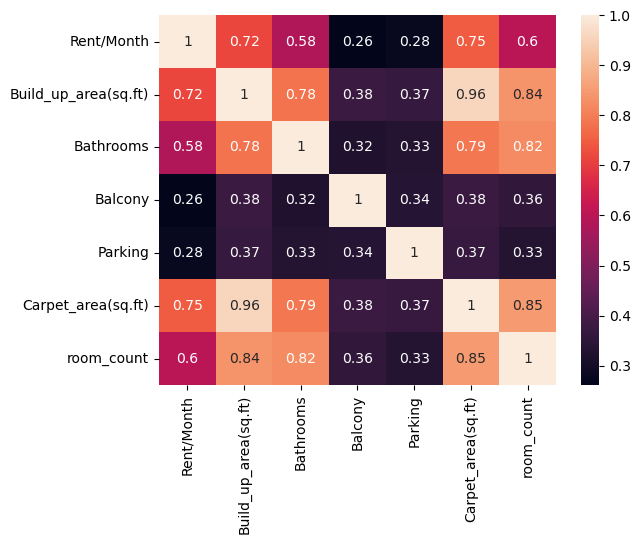

In [132]:
# Now, we donot have any such out of range values

sns.heatmap(m_rents_temp.corr(),annot=True)

<Axes: xlabel='Carpet_area(sq.ft)', ylabel='Rent/Month'>

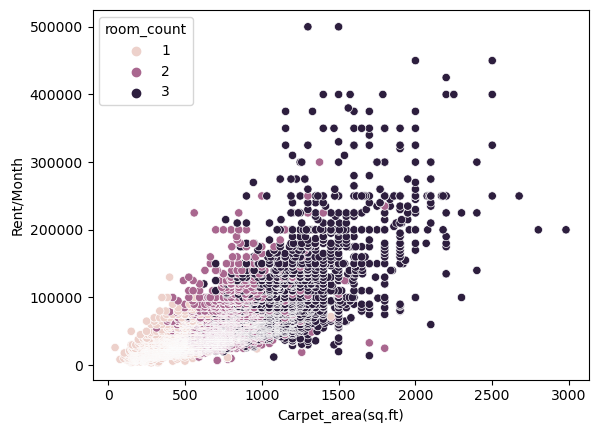

In [139]:
#This gives us a good idea that our factors like Build_up_area, Carpet_area, room_count are highly correlated to rent/month


sns.scatterplot(x=m_rents["Carpet_area(sq.ft)"], y=m_rents["Rent/Month"], hue=m_rents["room_count"])

In [ ]:
## Yes !!!, finally my data looks sensible. Had been using '' inside sns command due to which was unable to pick hue previously

In [ ]:
#Now, lets create dummy variables for Furnished and Location